## QUINTO ANÁLISIS SELECCIONANDO SÓLO LA TIPOLOGÍA PISOS, ACOTANDO DATOS Y ELIMINANDO OUTLIERS DOS VECES.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyod.models.knn import KNN

In [69]:
data = pd.read_csv("../outputs/house_fit.csv", index_col=0)

In [70]:
data.head()

,house_type_id,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
0,0,0,0,64.0,2,1.0,3.0,1,0,0,0,0,0,0,40.343263,-3.688352,85000
1,0,1,0,70.0,3,1.0,4.0,1,1,0,0,1,0,0,40.355109,-3.700105,129900
2,0,0,0,94.0,2,2.0,1.0,1,1,0,1,0,0,0,40.345539,-3.710970,144247
3,0,0,0,64.0,2,1.0,0.0,1,1,0,1,0,0,0,40.345539,-3.710970,109900
4,0,0,0,108.0,2,2.0,4.0,1,1,1,1,0,0,1,40.355841,-3.688399,260000


In [71]:
# Para este análisis, vamos a quedarnos sólo con la tipología piso.

data.house_type_id.value_counts()

0    15858
2      910
1      630
Name: house_type_id, dtype: int64

In [72]:
# La tipología pisos se corresponde con el valor 0 de la columna house_type_id, eliminamos los otros datos.

data = data.drop(data[data["house_type_id"]==1].index)
data = data.drop(data[data["house_type_id"]==2].index)

In [73]:
# Eliminamos ahora la columna house_type_id, ya que al sólo existir una tipología, ya no es necesaria.

data = data.drop("house_type_id", axis=1)

In [74]:
# Vamos a realizar ahora un análisis estadístico de los datos numéricos para ver como acotamos los mismos.

data.describe()

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,1.585800e+04
mean,0.203998,0.057826,120.263085,2.868773,1.828415,2.529134,0.900366,0.765986,0.308299,0.327658,0.390907,0.163261,0.182873,40.423055,-3.688877,5.403210e+05
std,0.402980,0.233421,81.550413,1.214570,1.001548,1.989354,0.299521,0.423395,0.461805,0.469374,0.487969,0.369616,0.386575,0.035346,0.036565,5.901108e+05
min,0.000000,0.000000,16.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.339934,-3.828783,3.600000e+04
25%,0.000000,0.000000,70.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.397292,-3.708916,1.900000e+05
50%,0.000000,0.000000,95.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.424816,-3.693014,3.480000e+05
75%,0.000000,0.000000,140.000000,3.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.445414,-3.667970,6.366000e+05
max,1.000000,1.000000,894.000000,15.000000,14.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.520554,-3.546616,8.500000e+06


### Del anterior análisis, viendo donde se concentran la mayoría de los datos, vamos a realizar una selección lógica de datos.

In [75]:
data = data.drop(data[data["buy_price"]>1000000].index)
data = data.drop(data[data["m2"]<40].index)
data = data.drop(data[data["m2"]>200].index)
data = data.drop(data[data["n_rooms"]>3].index)
data = data.drop(data[data["n_bathrooms"]<1].index)
data = data.drop(data[data["n_bathrooms"]>3].index)

In [76]:
# Eliminamos los outliers (x2)

for bucle in range (2):
    clf = KNN(contamination=0.5, method="largest", algorithm="auto")
    clf.fit(data)
    y_pred = clf.predict(data)
    dropea = data[y_pred == 1]
    data = data.drop(dropea.index)

In [77]:
# Vamos a analizar nuestra tabla resultante.

data.describe()

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000
mean,0.176915,0.016129,75.626008,2.303427,1.270665,1.970514,0.890121,0.598034,0.173891,0.213458,0.344758,0.145917,0.109879,40.417014,-3.691914,260286.971774
std,0.381645,0.125988,20.005337,0.691821,0.453345,1.450602,0.312778,0.490357,0.379064,0.409800,0.475349,0.353068,0.312778,0.035713,0.038660,141775.477097
min,0.000000,0.000000,40.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.339934,-3.828783,85000.000000
25%,0.000000,0.000000,60.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.388788,-3.715618,150000.000000
50%,0.000000,0.000000,72.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.413722,-3.699705,215000.000000
75%,0.000000,0.000000,86.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.443621,-3.664359,335000.000000
max,1.000000,1.000000,160.000000,3.000000,3.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.520554,-3.546616,850000.000000


In [78]:
data.to_csv("../outputs/5_houses_bounded_and_no_outliers(x2).csv")

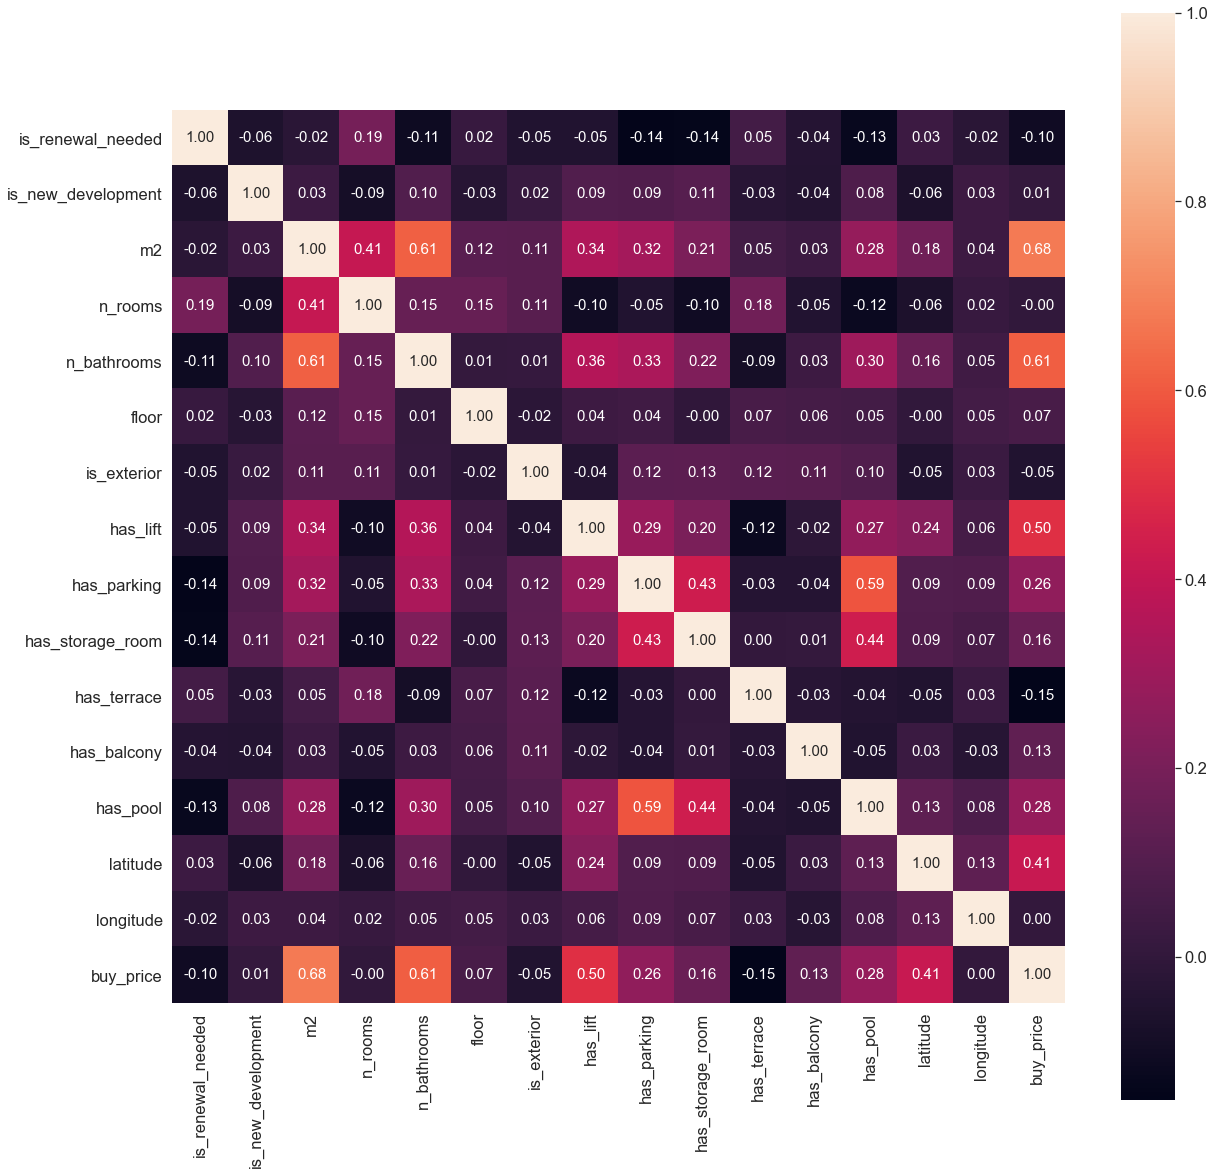

In [12]:
# Vamos a realizar un heatmap para ver la relación entre los datos.

cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                yticklabels=data.columns, xticklabels=data.columns)

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


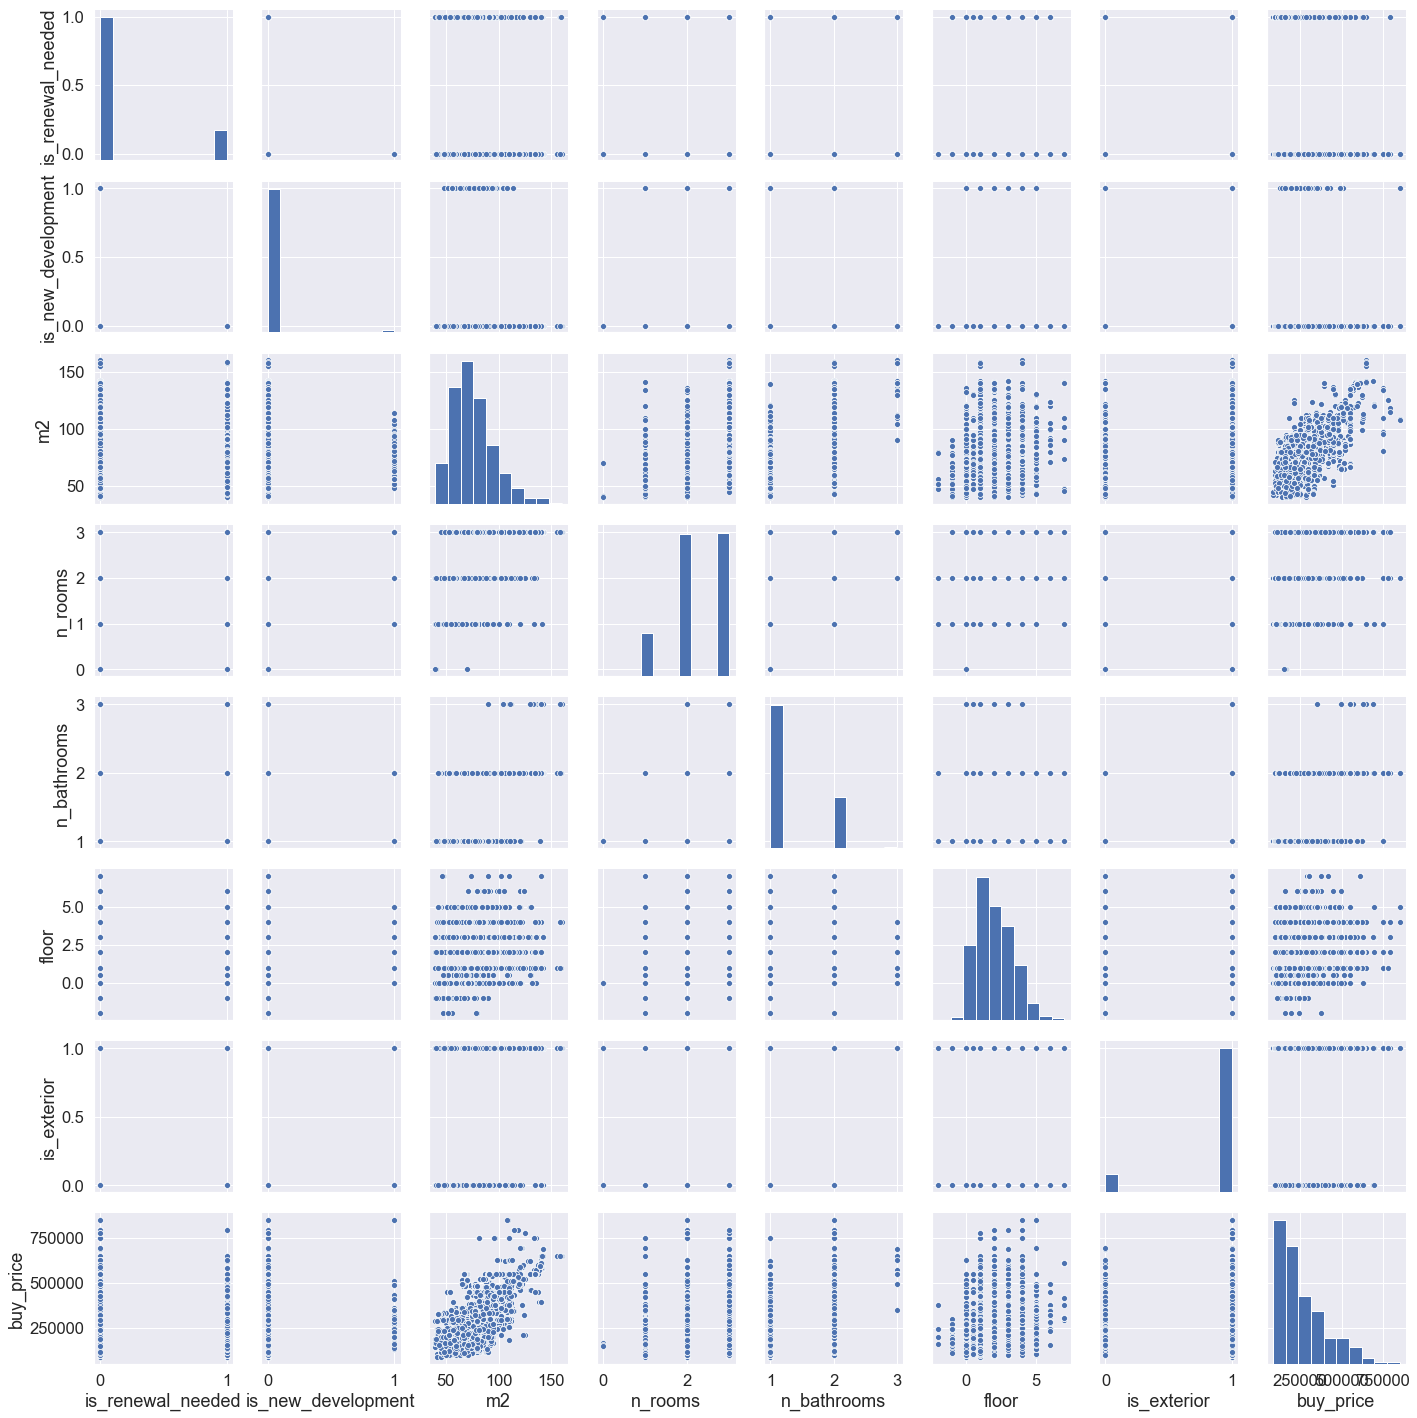

In [13]:
# Vamos a realizar ahora un pairplot para ver como se relacionan los datos entre sí.
# Como tenemos muchas features, vamos a dividirlas en dos análisis.

d_analysis_1 = data[["is_renewal_needed", "is_new_development","m2", "n_rooms",
                    "n_bathrooms", "floor", "is_exterior", "buy_price"]]

sns.pairplot(data, size=2.5, vars=d_analysis_1)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


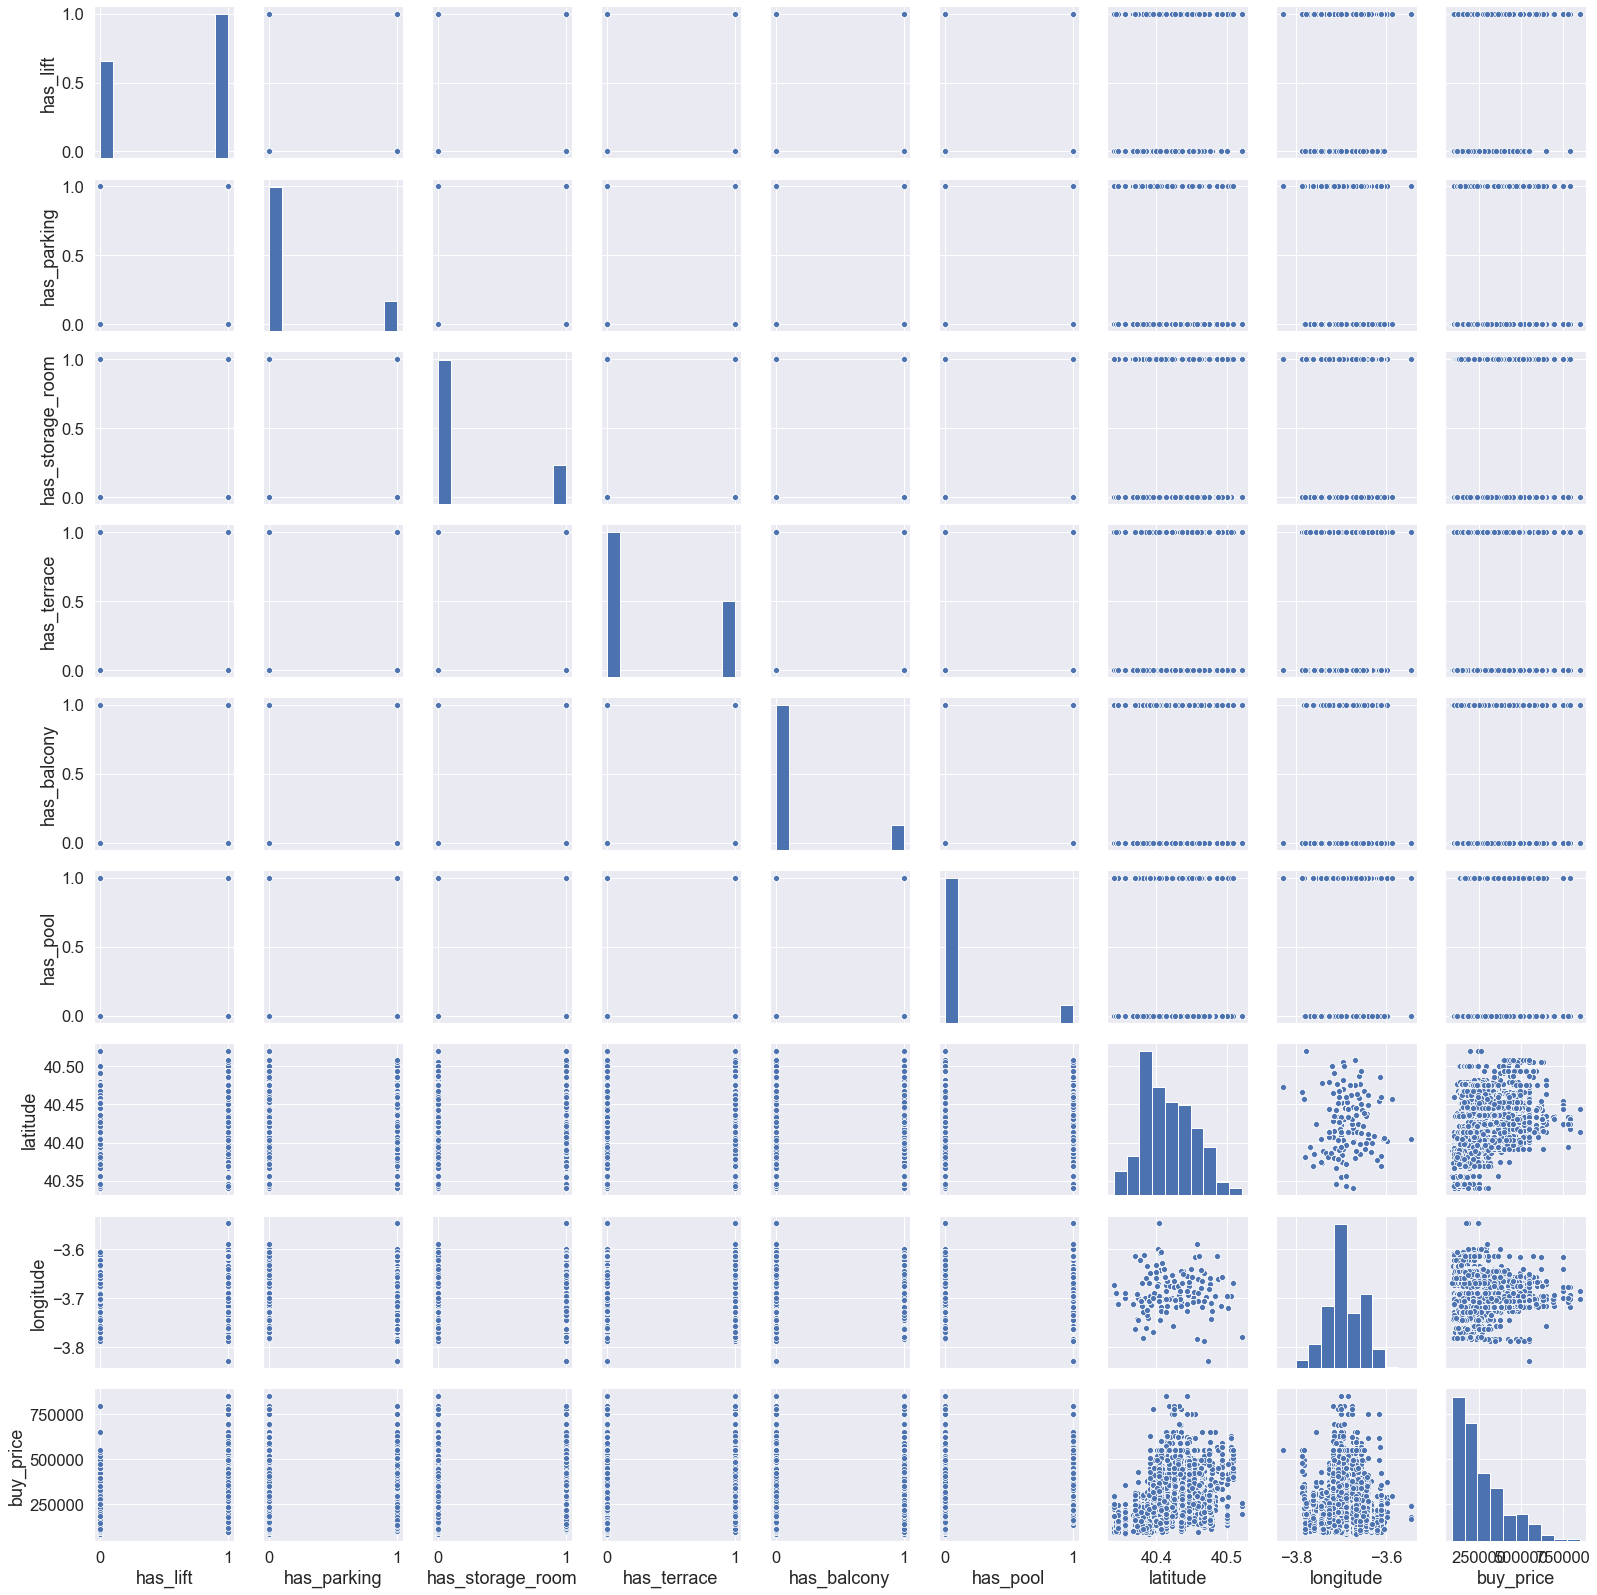

In [14]:
d_analysis_2 = data[["has_lift", "has_parking", "has_storage_room", "has_terrace",
              "has_balcony", "has_pool", "latitude", "longitude", "buy_price"]]

sns.pairplot(data, size=2.5, vars=d_analysis_2)
plt.tight_layout()

## Nos metemos ya de lleno con el entrenamiento de nuestro modelo.

### Empezaremos entrenando los datos con el módulo sklearn.

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [16]:
X = data.drop(["buy_price"], axis=1)
y = data['buy_price']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [18]:
models = {"DecisionTree" : DecisionTreeRegressor(),
          "RandomForest": RandomForestRegressor(),
          "ExtraTrees" : ExtraTreesRegressor(),
          "GradientBoosting" : GradientBoostingRegressor(),
          "HistGradientBoosting": HistGradientBoostingRegressor(),
          "Voting": VotingRegressor(
              [('etr', ExtraTreesRegressor()),
               ('rf', RandomForestRegressor())]
          )
         }

In [19]:
# Entrenamos los datos

for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Entrenamiento finalizado")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Entrenamiento finalizado


-------DecisionTree-------
RMSE 54866.0
R2 0.846
-------RandomForest-------
RMSE 38067.483
R2 0.926
-------ExtraTrees-------
RMSE 44632.024
R2 0.898
-------GradientBoosting-------
RMSE 43782.202
R2 0.902
-------HistGradientBoosting-------
RMSE 39302.062
R2 0.921
-------Voting-------
RMSE 38877.009
R2 0.923


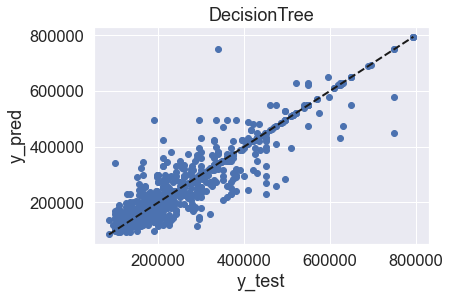

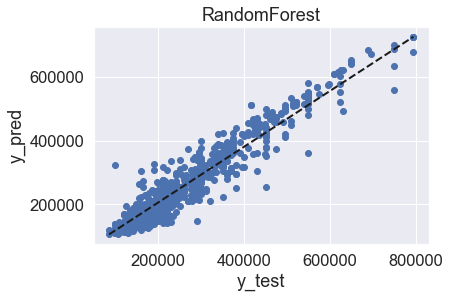

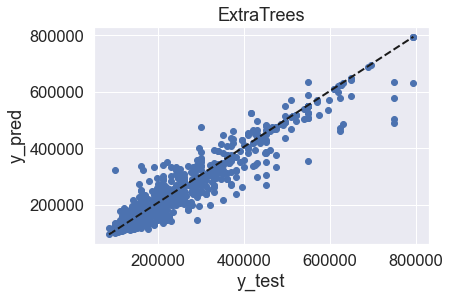

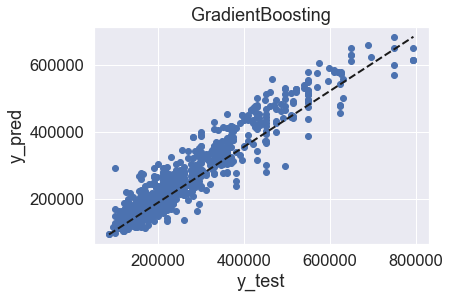

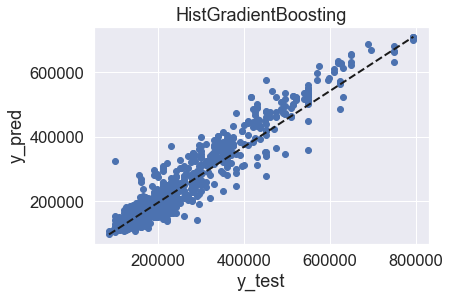

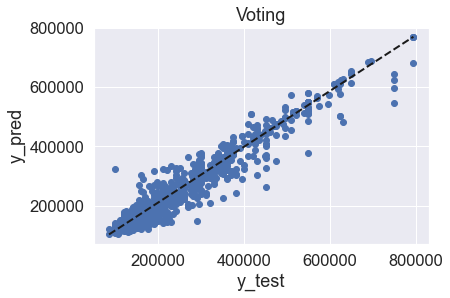

In [20]:
# Comprobamos el resultado de las métricas seleccionadas.

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")

In [21]:
# Aplicamos un crossvalidation para ver cual es el modelo que mejor funciona.

for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.501239423837754
RandomForest accuracy0.6878236150338133
ExtraTrees accuracy0.6564311326556231
GradientBoosting accuracy0.7006796946459175
HistGradientBoosting accuracy0.7415400155768872
Voting accuracy0.6995679490502036


In [22]:
# Como podemos comprobar, el modelo que mejores datos arroja es RandomForest.
# Sin embargo, no son buenos datos, el RMSE es ahora de 38067 €, y el R2 (0.926) ha mejorado con respecto 
# al cuarto análisis, pero es un dato muy bajo. 
# En este caso, el crossvalidation indica que Voting es el mejor modelo.
# Como podemos ver en las gráficas, continuamos observando mucha dispersión en los datos.

### Vamos a entrenar nuestros datos con el módulo xgboost,  para ver si mejoran los resultados.

In [23]:
from xgboost import XGBRegressor

RMSE 39449.826
R2 0.921


Text(0, 0.5, 'y_pred')

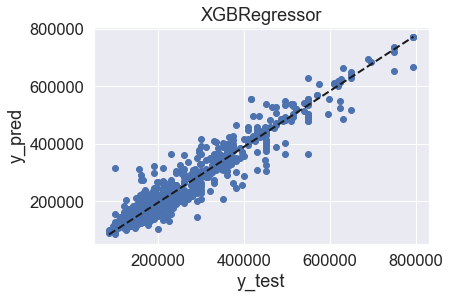

In [24]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print("R2", round(r2_score(y_test,y_pred),3))

# Ploteamos las gráficas.
plt.figure()
plt.title("XGBRegressor")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [25]:
# Nuestros datos no mejoran los obtenidos por los modelos de sklearn.

### Vamos a entrenar ahora con el módulo H2O.

In [26]:
# Comprobamos ahora si con el módulo H2O podemos obtener aún mejores resultados.
# Vamos a trabajar con cuatro modelos:
    # H2OAutoML
    # H2ORandomForestEstimator.
    # H2OGradientBoostingEstimator.
    # H2OXGBoostEstimator.

In [27]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OXGBoostEstimator

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 53 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_Javi_lbrz9m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,866 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


#### H2OAutoML

In [28]:
h2train = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [29]:
X = list(data.drop(["buy_price"], axis=1))
y = "buy_price"

In [30]:
automl = H2OAutoML(max_runtime_secs=1200, sort_metric='RMSE')
automl.train(X, y, training_frame=h2train)
leader_board = automl.leaderboard
leader_board.head()

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,rmse,mean_residual_deviance,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201015_172422,35019.5,1.22636e+09,1.22636e+09,23259.1,0.140076
StackedEnsemble_BestOfFamily_AutoML_20201015_172422,35583.2,1.26616e+09,1.26616e+09,23751.9,0.142865
GBM_grid__1_AutoML_20201015_172422_model_3,36641.6,1.34261e+09,1.34261e+09,24900.4,0.147054
GBM_grid__1_AutoML_20201015_172422_model_70,36754.9,1.35092e+09,1.35092e+09,24689.6,0.145257
GBM_grid__1_AutoML_20201015_172422_model_69,36946.9,1.36507e+09,1.36507e+09,24882.8,0.146783
XGBoost_grid__1_AutoML_20201015_172422_model_22,36999,1.36893e+09,1.36893e+09,24345.3,0.149248
XGBoost_grid__1_AutoML_20201015_172422_model_48,37052.8,1.37291e+09,1.37291e+09,25062.6,0.145521
XGBoost_grid__1_AutoML_20201015_172422_model_74,37106,1.37686e+09,1.37686e+09,25717.2,0.147207
GBM_3_AutoML_20201015_172422,37115.2,1.37754e+09,1.37754e+09,25048.3,0.145989
GBM_4_AutoML_20201015_172422,37119.5,1.37786e+09,1.37786e+09,25032.2,0.146145


#### Importamos ahora el csv para trabajar con el resto de modelos.

In [31]:
data = h2o.import_file("../outputs/5_houses_bounded_and_no_outliers(x2).csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
data.describe()

Rows:3968
Cols:17




,C1,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
type,int,int,int,int,int,int,real,int,int,int,int,int,int,int,real,real,int
mins,15.0,0.0,0.0,40.0,0.0,1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.3399339,-3.828782660082677,85000.0
mean,8346.996471774193,0.17691532258064516,0.016129032258064516,75.62600806451613,2.3034274193548385,1.2706653225806452,1.9705141129032258,0.8901209677419355,0.5980342741935484,0.17389112903225806,0.2134576612903226,0.34475806451612906,0.1459173387096774,0.10987903225806452,40.41701407909947,-3.6919140137398125,260286.97177419352
maxs,17396.0,1.0,1.0,160.0,3.0,3.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.5205538,-3.5466159,850000.0
sigma,5041.713361582109,0.3816451206573981,0.12598764542593344,20.00533704922699,0.6918214628792034,0.453345251105458,1.4506024887405324,0.3127783325902047,0.49035688873605865,0.3790636045259611,0.40979972018013494,0.4753492255668687,0.35306781858313907,0.3127783325902047,0.03571266274116383,0.03866013156013216,141775.477096877
zeros,0,3266,3904,0,3,0,507,436,1595,3278,3121,2600,3389,3532,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,15.0,1.0,0.0,75.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.3455389,-3.7109697,129900.0
1,19.0,1.0,0.0,76.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,40.3455389,-3.7109697,110000.0
2,20.0,0.0,0.0,75.0,3.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,40.3455389,-3.7109697,138000.0


In [33]:
X = data.col_names[1:-1]
y = data.col_names[-1]

train, test =data.split_frame([0.8], seed=1234)
train.shape, test.shape

((3192, 17), (776, 17))

#### H2ORandomForestEstimator

In [34]:
rf_h2o = H2ORandomForestEstimator()
rf_h2o.train(X, y, training_frame=train)
print(rf_h2o)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602768662645_16


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,1026044.0,20.0,20.0,20.0,1567.0,1671.0,1627.86




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 1662917129.2817125
RMSE: 40778.8809223808
MAE: 26291.323411522633
RMSLE: 0.15716627927742802
Mean Residual Deviance: 1662917129.2817125

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 17:43:13,0.001 sec,0.0,NaN,NaN,NaN
1,,2020-10-15 17:43:13,0.032 sec,1.0,65361.706150,40133.976860,4.272153e+09
2,,2020-10-15 17:43:13,0.051 sec,2.0,61995.442355,37558.006937,3.843435e+09
3,,2020-10-15 17:43:13,0.075 sec,3.0,60467.565276,36486.122697,3.656326e+09
4,,2020-10-15 17:43:13,0.092 sec,4.0,58051.737399,35188.894553,3.370004e+09
5,,2020-10-15 17:43:13,0.111 sec,5.0,56748.663283,34522.434093,3.220411e+09
6,,2020-10-15 17:43:13,0.132 sec,6.0,54243.796596,33428.404942,2.942389e+09
7,,2020-10-15 17:43:13,0.152 sec,7.0,53365.862405,33056.441668,2.847915e+09
8,,2020-10-15 17:43:13,0.180 sec,8.0,52262.171695,32617.258656,2.731335e+09
9,,2020-10-15 17:43:13,0.205 sec,9.0,50326.778006,31611.235779,2.532785e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,6.382224e+14,1.000000,0.276567
1,n_bathrooms,5.768248e+14,0.903799,0.249961
2,latitude,5.119704e+14,0.802182,0.221857
3,longitude,2.142196e+14,0.335650,0.092830
4,has_lift,1.236174e+14,0.193690,0.053568
5,floor,6.114349e+13,0.095803,0.026496
6,n_rooms,3.832357e+13,0.060047,0.016607
7,has_pool,3.653857e+13,0.057251,0.015834
8,has_parking,3.030005e+13,0.047476,0.013130
9,has_terrace,1.958085e+13,0.030680,0.008485


In [35]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(rf_h2o.rmse(),3))
print("R2: ", round(rf_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", rf_h2o.model_performance(test).rmse())
print("R2: ", rf_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  40778.881
R2:  0.917
-------test metrics-------
RMSE:  35769.62099806392
R2:  0.9378055155045624


In [36]:
# Como podemos observar los datos están muy ajustados, pero el R2 continúa siendo bajo.

In [37]:
predict = rf_h2o.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


RMSE:  35769.62099806392
R2:  0.9378055155045624


Text(0, 0.5, 'y_pred')

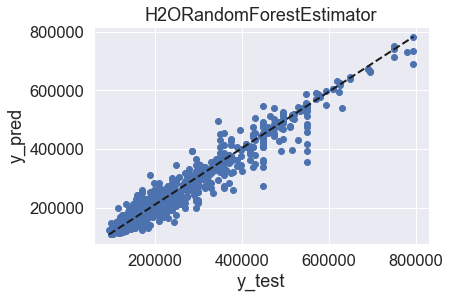

In [38]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", rf_h2o.model_performance(test, predict).rmse())
print("R2: ", rf_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2ORandomForestEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [39]:
# La dispersión está algo más ajustada que en los anteriores modelos.

In [40]:
print(predict, test[-1])

predict
184503
225175
281233
266280
134881
110325
167705
207650
217090
114970


buy_price
150000
210000
245000
225000
119900
105000
120000
155000
155000
120000


#### H2OGradientBoostingEstimator

In [41]:
gbm_h2o = H2OGradientBoostingEstimator()
gbm_h2o.train(X, y, training_frame=train)
print(gbm_h2o)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1602768662645_17


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,20255.0,5.0,5.0,5.0,15.0,32.0,27.54




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1252879153.4737265
RMSE: 35396.03301888118
MAE: 25018.42135367716
RMSLE: 0.1402900525392948
Mean Residual Deviance: 1252879153.4737265

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 17:43:15,0.002 sec,0.0,141341.987416,112783.581111,1.997756e+10
1,,2020-10-15 17:43:15,0.009 sec,1.0,130457.078476,104140.232187,1.701905e+10
2,,2020-10-15 17:43:15,0.014 sec,2.0,120622.839600,96326.620369,1.454987e+10
3,,2020-10-15 17:43:15,0.019 sec,3.0,111782.586338,89099.926780,1.249535e+10
4,,2020-10-15 17:43:15,0.023 sec,4.0,103869.754707,82487.958172,1.078893e+10
5,,2020-10-15 17:43:15,0.028 sec,5.0,96854.160905,76658.963894,9.380728e+09
6,,2020-10-15 17:43:15,0.039 sec,6.0,90607.072460,71533.954814,8.209642e+09
7,,2020-10-15 17:43:15,0.044 sec,7.0,84956.842347,66860.598699,7.217665e+09
8,,2020-10-15 17:43:15,0.049 sec,8.0,80108.332964,62698.998908,6.417345e+09
9,,2020-10-15 17:43:15,0.054 sec,9.0,75661.477166,59103.724835,5.724659e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,1.105414e+14,1.000000,0.351399
1,latitude,8.351208e+13,0.755483,0.265476
2,n_bathrooms,6.632816e+13,0.600030,0.210850
3,longitude,2.396426e+13,0.216790,0.076180
4,has_lift,1.244269e+13,0.112561,0.039554
5,n_rooms,6.463856e+12,0.058475,0.020548
6,floor,3.685639e+12,0.033342,0.011716
7,has_pool,2.973512e+12,0.026900,0.009452
8,has_parking,1.355325e+12,0.012261,0.004308
9,is_renewal_needed,9.958773e+11,0.009009,0.003166


In [42]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(gbm_h2o.rmse(),3))
print("R2: ", round(gbm_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", gbm_h2o.model_performance(test).rmse())
print("R2: ", gbm_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  35396.033
R2:  0.937
-------test metrics-------
RMSE:  41026.98691780363
R2:  0.9181794412010952


In [43]:
# Como podemos observar los datos están muy ajustados, pero el R2 continúa siendo bajo.

In [44]:
predict = gbm_h2o.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


RMSE:  41026.98691780363
R2:  0.9181794412010952


Text(0, 0.5, 'y_pred')

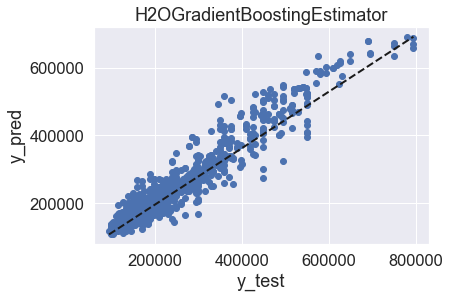

In [45]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", gbm_h2o.model_performance(test, predict).rmse())
print("R2: ", gbm_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2OGradientBoostingEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [46]:
# Existe mayor dispersión de los datos con respecto a H2ORandomForestEstimator.
# Existe una mayoría de viviendas predecidas por encima de su precio real.

In [47]:
print(predict, test[-1])

predict
207008
244689
276368
262758
145604
114683
155850
203666
209495
125775


buy_price
150000
210000
245000
225000
119900
105000
120000
155000
155000
120000


#### H2OXGBoostEstimator

In [48]:
xgbm_h2o = H2OXGBoostEstimator()
xgbm_h2o.train(X, y, training_frame=train)
print(xgbm_h2o)

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1602768662645_18


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 449729543.53158766
RMSE: 21206.827757389543
MAE: 14669.756336642387
RMSLE: 0.09763478775662116
Mean Residual Deviance: 449729543.53158766

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 17:43:16,0.001 sec,0.0,295672.695511,259701.338972,8.742234e+10
1,,2020-10-15 17:43:16,0.022 sec,1.0,212451.061542,182711.489119,4.513545e+10
2,,2020-10-15 17:43:16,0.031 sec,2.0,154114.875711,128695.772507,2.375139e+10
3,,2020-10-15 17:43:16,0.039 sec,3.0,113880.687954,91070.062003,1.296881e+10
4,,2020-10-15 17:43:16,0.047 sec,4.0,86227.064667,65565.905518,7.435107e+09
5,,2020-10-15 17:43:17,0.054 sec,5.0,67583.826817,49175.301814,4.567574e+09
6,,2020-10-15 17:43:17,0.062 sec,6.0,55314.385117,38903.039151,3.059681e+09
7,,2020-10-15 17:43:17,0.070 sec,7.0,47303.502907,32822.605983,2.237621e+09
8,,2020-10-15 17:43:17,0.078 sec,8.0,41987.822026,29001.428669,1.762977e+09
9,,2020-10-15 17:43:17,0.086 sec,9.0,38455.985225,26528.869814,1.478863e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,3.329763e+13,1.000000,0.286897
1,n_bathrooms,3.266788e+13,0.981087,0.281471
2,latitude,3.011957e+13,0.904556,0.259514
3,longitude,9.542056e+12,0.286569,0.082216
4,has_lift,4.274726e+12,0.128379,0.036832
5,n_rooms,1.764286e+12,0.052985,0.015201
6,floor,1.470326e+12,0.044157,0.012669
7,has_pool,8.151187e+11,0.024480,0.007023
8,is_exterior,5.059490e+11,0.015195,0.004359
9,has_parking,4.048058e+11,0.012157,0.003488


In [49]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(xgbm_h2o.rmse(),3))
print("R2: ", round(xgbm_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", xgbm_h2o.model_performance(test).rmse())
print("R2: ", xgbm_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  21206.828
R2:  0.977
-------test metrics-------
RMSE:  37862.3269569296
R2:  0.9303152416506341


In [50]:
# Como podemos observar, hay mucho overfittig. el R2 es el mejor de todos pero es bajo.

In [51]:
predict = xgbm_h2o.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


RMSE:  37862.3269569296
R2:  0.9303152416506341


Text(0, 0.5, 'y_pred')

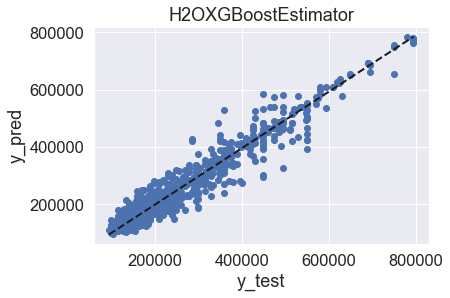

In [52]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", xgbm_h2o.model_performance(test, predict).rmse())
print("R2: ", xgbm_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2OXGBoostEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [53]:
# Los datos están algo más concentrados, pero sigue existiendo dispersión.
# Los datos están bastante equilibrados, existiendo precios por encima y por debajo de su precio real.

In [54]:
print(predict, test[-1])

predict
186142
215604
262498
274226
125386
95168.6
137882
187214
190466
123458


buy_price
150000
210000
245000
225000
119900
105000
120000
155000
155000
120000


In [55]:
# En este test, nos vamos a quedar con RandomForestRegressor, que parece ser el modelo más equilibrado y
# que más se ajusta a la realidad.

## Tasación manual.

In [56]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn import preprocessing

In [57]:
vivienda = {'neighborhood_id': "Malasaña-Universidad, Centro(Madrid)", 
            'is_renewal_needed': True,    
            'is_new_development': False,   
            'm2': 90,           
            'n_rooms': 2,                
            'n_bathrooms': 2,            
            'floor': 2,                  
            'is_exterior': True,          
            'has_lift': True,           
            'has_parking': True,            
            'has_storage_room': True,      
            'has_terrace': True,         
            'has_balcony': True,         
            'has_pool': True                   
           }

In [58]:
geolocator = Nominatim(user_agent="http")

locate = geolocator.geocode(vivienda["neighborhood_id"], timeout=7)
vivienda["latitude"] = locate.latitude
vivienda["longitude"] = locate.longitude

In [59]:
vivienda.pop("neighborhood_id")

'Malasaña-Universidad, Centro(Madrid)'

In [60]:
piso = pd.DataFrame.from_dict(vivienda, orient='index').T
piso

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude
0,True,False,90,2,2,2,True,True,True,True,True,True,True,40.4267,-3.70423


In [61]:
def transf(column):

    le = preprocessing.LabelEncoder()
    piso[column] = le.fit_transform(piso[column])
    return piso[column]

In [62]:
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [63]:
piso.to_csv("../outputs/new_piso.csv")

In [64]:
piso = h2o.import_file("../outputs/new_piso.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [67]:
estimated_price = rf_h2o.predict(piso)
print(estimated_price)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
445300


## En este caso, hemos mejorado los resultados de predicción con respecto al anterior análisis, pero se quedan muy por debajo de los obtenidos en el test nº3.

## Finalmente seleccionamos dicho test como mejor modelo predictor, a pesar de tener un RMSE elevado.